<a href="https://colab.research.google.com/github/fatymazahrae/DataCleanOptimizer/blob/main/COptimizerpart3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
import warnings
warnings.filterwarnings('ignore')

C:\Users\ANDDAME FATIMA\anaconda4\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
import dask.dataframe as dd

# Path to your CSV file in Google Drive
file_path = '/content/drive/My Drive/adult.csv'

# Load the data using Dask (similar to pd.read_csv for Pandas)
df = dd.read_csv(file_path)

# To get a quick look at the data, you can compute a small sample
print(df.head())


In [ ]:
import dask.dataframe as dd

# Path to your CSV file in Google Drive
file_path = '/content/drive/My Drive/'

# Load the data using Dask (similar to pd.read_csv for Pandas)
df = dd.read_csv(file_path)

# To get a quick look at the data, you can compute a small sample
print(df.head())


In [ ]:
print(np.isnan(df.compute()).sum())  # Count NaNs in your dataset


age                166
workclass            0
fnlwgt             166
education            0
educational-num    166
marital-status       0
occupation           0
relationship         0
race                 0
gender               0
capital-gain       166
capital-loss       166
hours-per-week     166
native-country       0
income               0
dtype: int64


In [ ]:
def detect_dtype(data):
    num_features = []
    cat_features = []

    for col in data.columns:
        if data[col].dtype.kind in 'biufc':
            num_features.append(col)
        else:
            cat_features.append(col)

    return num_features, cat_features

num_features, cat_features = detect_dtype(df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

for ftr in cat_features:
    df[ftr] = df[ftr].fillna('missing')

mean_values = df[num_features].mean().compute()
df[num_features] = df[num_features].fillna(mean_values)

data_sample = df[num_features].sample(frac=0.1).compute()
scaler = MinMaxScaler()
scaler.fit(data_sample)

df[num_features] = df.map_partitions(lambda partition: pd.DataFrame(scaler.transform(partition[num_features]),
                                                                    columns=num_features))
label_encoders = {}

def label_encode_partition(partition, encoders):
    for col in cat_features:
        encoder = encoders[col]
        partition[col] = encoder.fit_transform(partition[col])
    return partition

# Create LabelEncoders for each categorical column
label_encoders = {col: LabelEncoder() for col in cat_features}

# Apply the label encoding partition by partition
df = df.map_partitions(label_encode_partition, encoders=label_encoders, meta=df)

In [ ]:
print(np.isnan(df.compute()).sum())  # Count NaNs in your dataset


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [ ]:
df.compute().shape

(48674, 15)

In [ ]:
# from keras.layers import Input, Embedding, Flatten, Dense, concatenate
# from keras.models import Model
# from keras.optimizers import Adam

# num_input = Input(shape=(len(num_features),), name='num_input')

# def embed_ftr(ftr):
#     cat_input = Input(shape=(1,), name=f'cat_input_{ftr}')
#     cat_embed = Embedding(input_dim=len(df[ftr].unique()), output_dim=2, input_length=1)(cat_input)
#     cat_flatten = Flatten()(cat_embed)
#     return cat_input, cat_flatten

# embedded_cats = []
# cat_inputs = []

# for ftr in cat_features:
#     cat_input, embedded_cat = embed_ftr(ftr)
#     embedded_cats.append(embedded_cat)
#     cat_inputs.append(cat_input)

# # Combine numerical input and embedded categorical features
# combined = concatenate([num_input] + embedded_cats)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df.compute(), test_size=0.2, random_state=42)


In [ ]:
X_train.shape

(38939, 15)

In [ ]:
import numpy as np
print(np.isnan(X_train).sum())  # Count NaNs in your dataset
print(np.isinf(X_train).sum())  # Count infinite values


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [ ]:
# from keras.models import Model
# from keras.layers import Input, Dense
# from keras.optimizers import Adam

# INPUT_SHAPE = X_train.shape[1]

# input_layer = Input(shape=(INPUT_SHAPE,))
# x = Dense(64, activation='relu')(input_layer)
# x = Dense(16, activation='relu')(x)
# code = Dense(2, activation='relu')(x)
# x = Dense(16, activation='relu')(code)
# x = Dense(64, activation='relu')(x)
# output_layer = Dense(INPUT_SHAPE, activation='relu')(x)

# autoencoder = Model(input_layer, output_layer, name='anomaly')
# autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# # Summary of the model
# autoencoder.summary()

Model: "anomaly"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 2)                   │              34 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 15)                  │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,209 (16.44 KB)

 Trainable params: 4,209 (16.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau

INPUT_SHAPE = X_train.shape[1]

# Encoder
input_layer = Input(shape=(INPUT_SHAPE,))
x = Dense(64, activation='linear', kernel_regularizer=l2(0.001))(input_layer)
x = BatchNormalization()(x)
x = Dense(16, activation='linear', kernel_regularizer=l2(0.001))(x)
code = Dense(8, activation='linear')(x)  # Larger bottleneck

# Decoder
x = Dense(16, activation='linear')(code)
x = BatchNormalization()(x)
x = Dense(64, activation='linear')(x)
output_layer = Dense(INPUT_SHAPE, activation='linear')(x)  # Use 'linear' or 'sigmoid' for reconstruction

# Model
autoencoder = Model(input_layer, output_layer, name='anomaly')
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Summary of the model
autoencoder.summary()


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=64, validation_split=0.2)


Model: "anomaly"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 15)                  │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,727 (18.46 KB)

 Trainable params: 4,567 (17.84 KB)

 Non-trainable params: 160 (640.00 B)

Epoch 1/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1729 - val_loss: 0.0400
Epoch 2/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0327 - val_loss: 0.0223
Epoch 3/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0190 - val_loss: 0.0154
Epoch 4/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0137 - val_loss: 0.0122
Epoch 5/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0120 - val_loss: 0.0117
Epoch 6/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0114 - val_loss: 0.0107
Epoch 7/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0111 - val_loss: 0.0115
Epoch 8/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0108 - val_loss: 0.0111
Epoch 9/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0106 - val_loss: 0.0099
Epoch 10/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0103 - val_loss: 0.0096
Epoch 11/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0101 - val_loss: 0.0097
Epoch 12/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

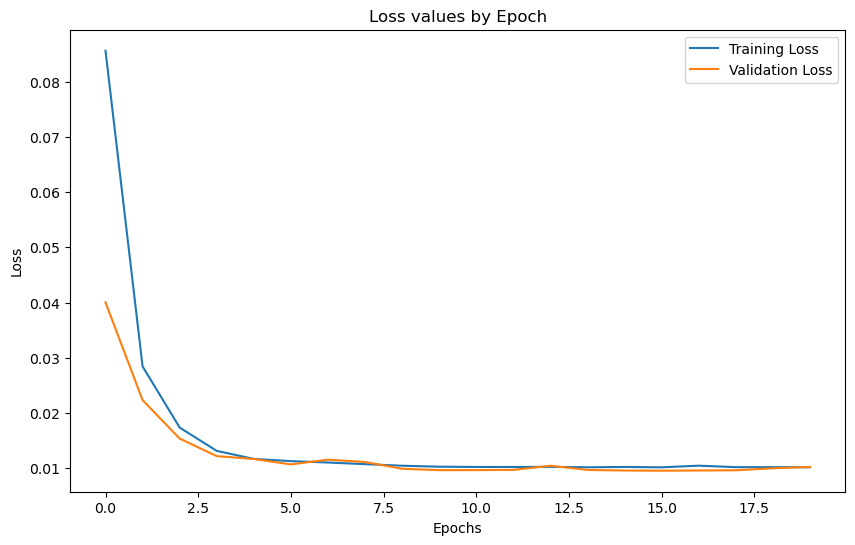

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss values by Epoch")
plt.show()